# Importing Libraries

In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


# Exploratory Data Analysis

In [3]:
#Load Data
def load_data(filepath):
    data = pd.read_csv(filepath)
    return data

In [4]:
# Summarize Data
def summarize_data(data):
    print("Data Info:")
    print(data.info())
    print("\nMissing Values:")
    print(data.isnull().sum())
    print("\nBasic Statistics:")
    print(data.describe())

In [5]:
# Visualize Missing Values
def plot_missing_values(data):
    missing = data.isnull().mean().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    missing[missing > 0].plot(kind='bar', color='salmon')
    plt.title("Percentage of Missing Values by Column")
    plt.ylabel("Percentage")
    plt.xlabel("Features")
    plt.show()

In [6]:
# Univariate Analysis
def univariate_analysis(data, numerical_features, categorical_features):
    for feature in numerical_features:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[feature], kde=True, bins=30, color='blue')
        plt.title(f"Distribution of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.show()

    for feature in categorical_features:
        if feature != 'neighbourhood':  # Remove neighbourhood-specific graph
            plt.figure(figsize=(8, 4))
            sns.countplot(x=feature, data=data, palette='Set2')
            plt.title(f"Count of {feature}")
            plt.xlabel(feature)
            plt.ylabel("Count")
            plt.xticks(rotation=45)
            plt.show()

In [7]:
# Bivariate Analysis
def bivariate_analysis(data, target, numerical_features, categorical_features):
    for feature in numerical_features:
        plt.figure(figsize=(8, 4))
        sns.scatterplot(x=data[feature], y=data[target], alpha=0.5)
        plt.title(f"{feature} vs {target}")
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.show()

    for feature in categorical_features:
        if feature != 'neighbourhood':  # Remove neighbourhood-specific graph
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=data[feature], y=data[target], palette='Set3')
            plt.title(f"{feature} vs {target}")
            plt.xlabel(feature)
            plt.ylabel(target)
            plt.xticks(rotation=45)
            plt.show()

In [8]:
# Correlation Analysis
def correlation_analysis(data, numerical_features):
    plt.figure(figsize=(12, 8))
    corr = data[numerical_features].corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title("Correlation Heatmap")
    plt.show()

In [9]:
# Outlier Analysis
def outlier_analysis(data, numerical_features):
    for feature in numerical_features:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=data[feature], palette='pastel')
        plt.title(f"Boxplot of {feature}")
        plt.xlabel(feature)
        plt.show()

In [10]:
# Main EDA Pipeline
def eda_pipeline(filepath):
    # Load the data
    data = load_data(filepath)

    # Summarize the data
    summarize_data(data)

    # Visualize missing values
    plot_missing_values(data)

    # Define feature types
    numerical_features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
                          'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'price']
    categorical_features = ['neighbourhood_group', 'room_type']  # Excluded 'neighbourhood'

    # Univariate analysis
    univariate_analysis(data, numerical_features, categorical_features)

    # Bivariate analysis
    bivariate_analysis(data, target='price', numerical_features=numerical_features, categorical_features=categorical_features)

    # Correlation analysis
    correlation_analysis(data, numerical_features)

    # Outlier analysis
    outlier_analysis(data, numerical_features)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review          

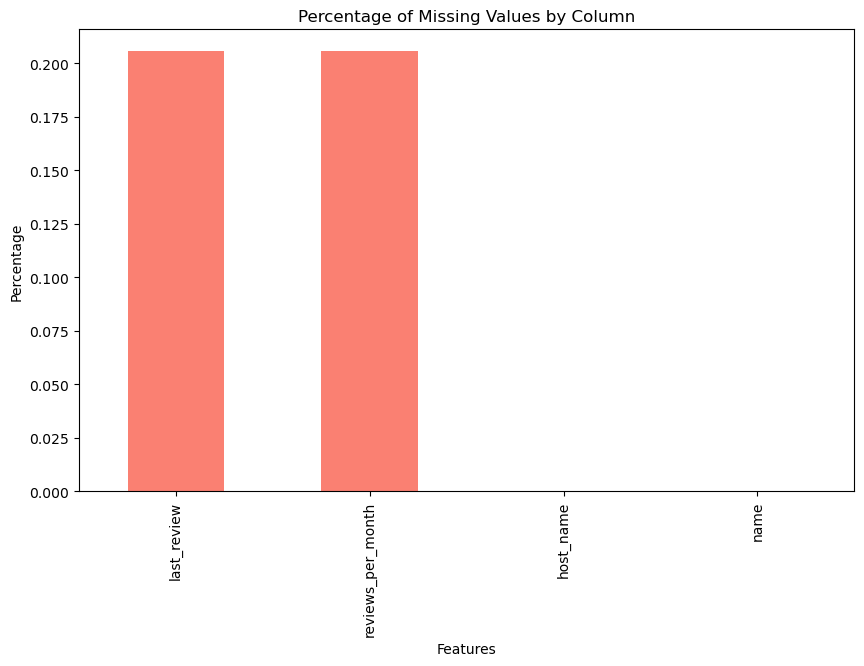

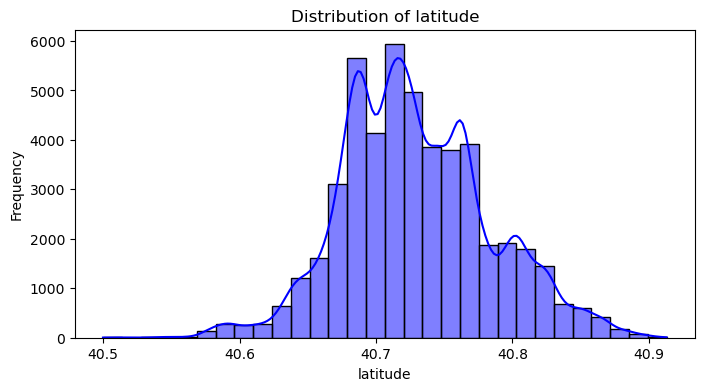

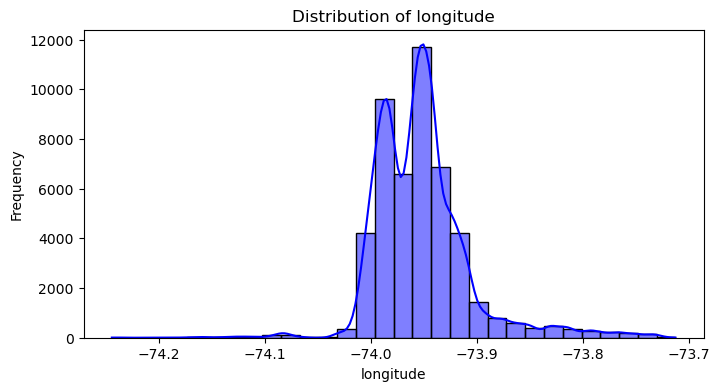

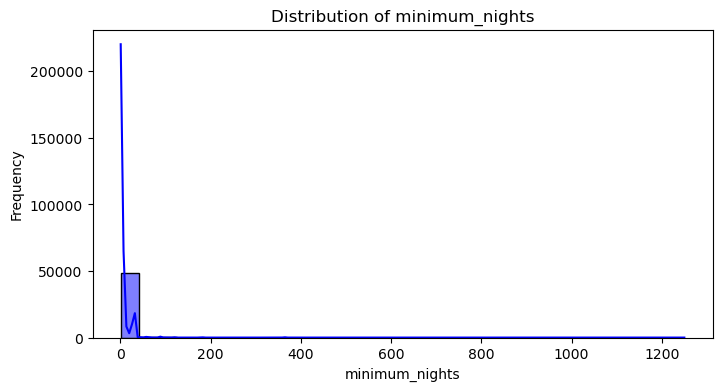

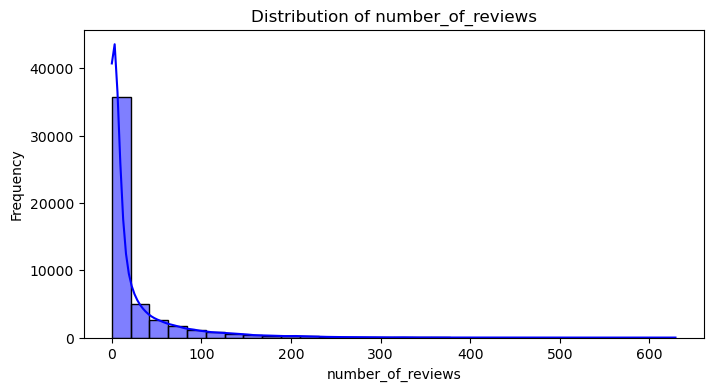

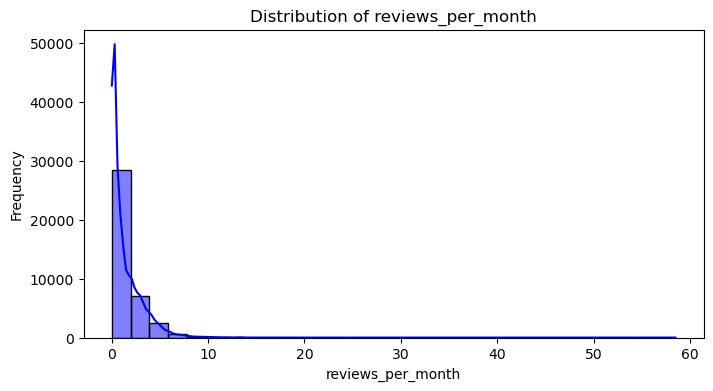

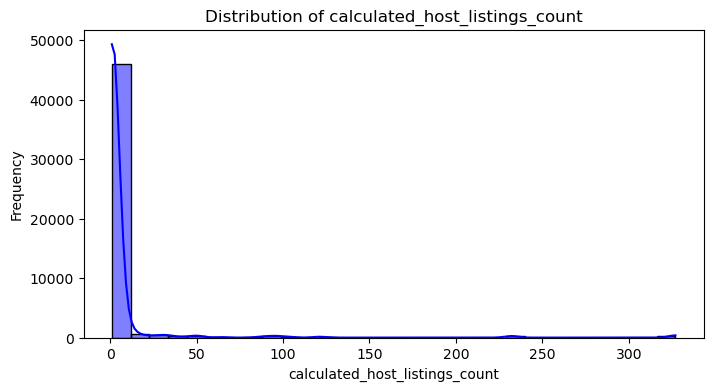

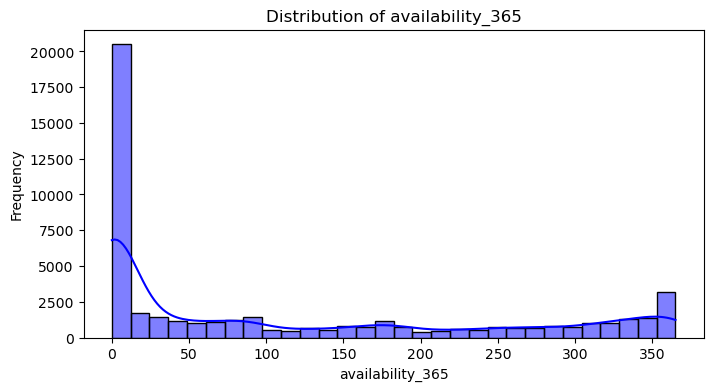

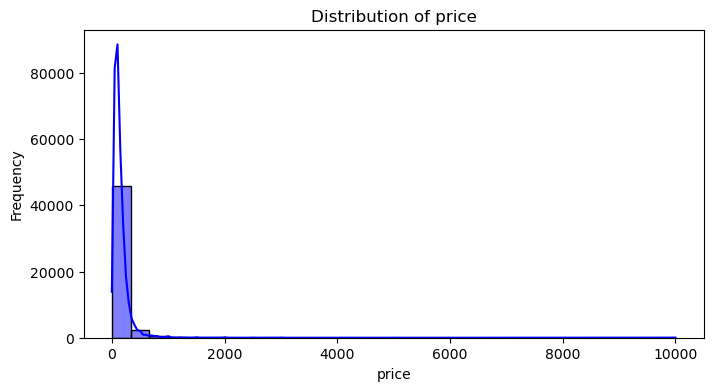

/tmp/ipykernel_1113/1430736240.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='Set2')


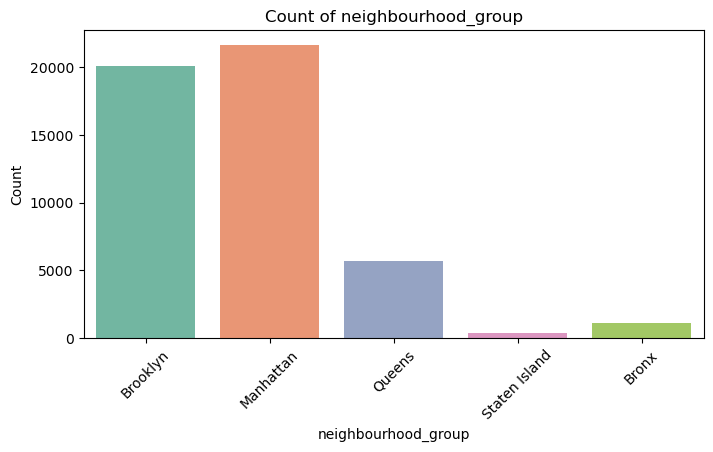

/tmp/ipykernel_1113/1430736240.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='Set2')


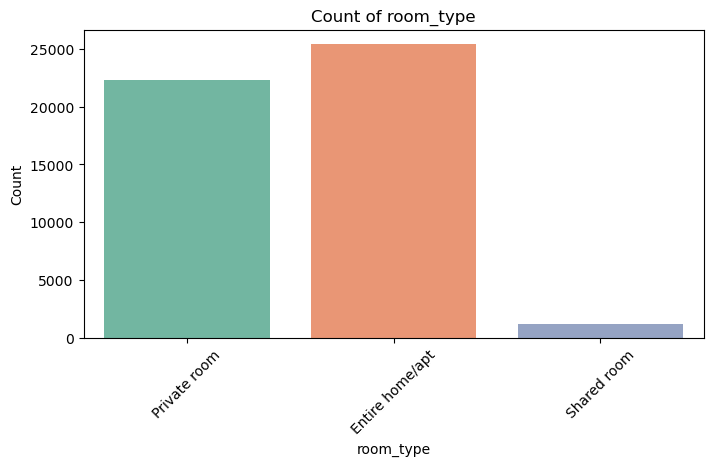

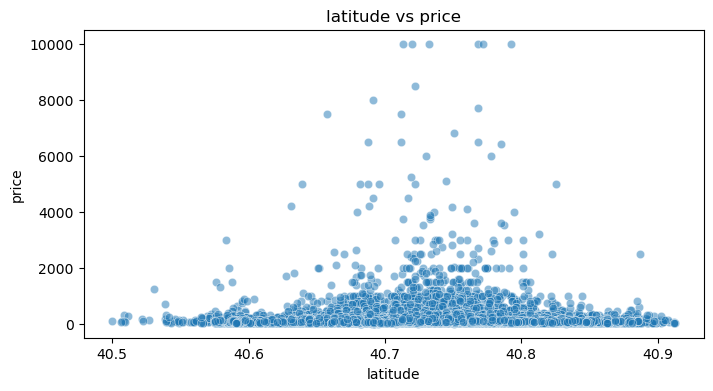

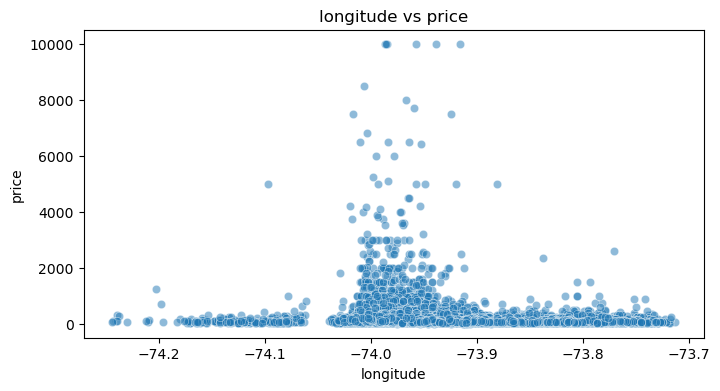

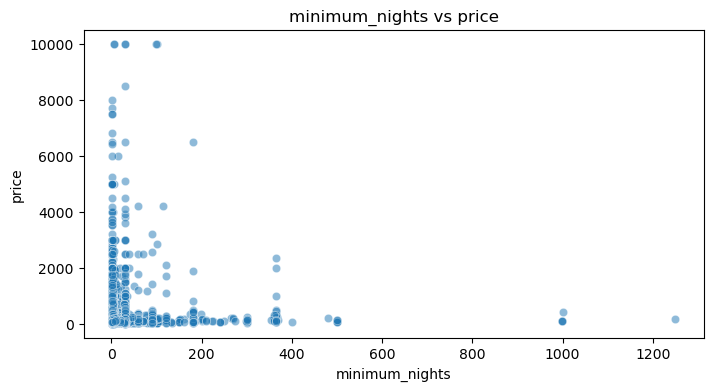

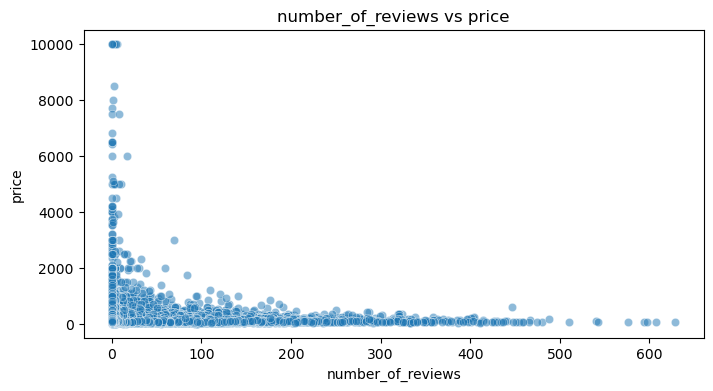

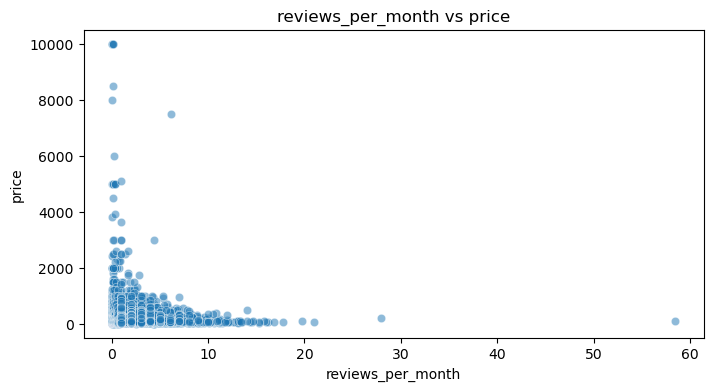

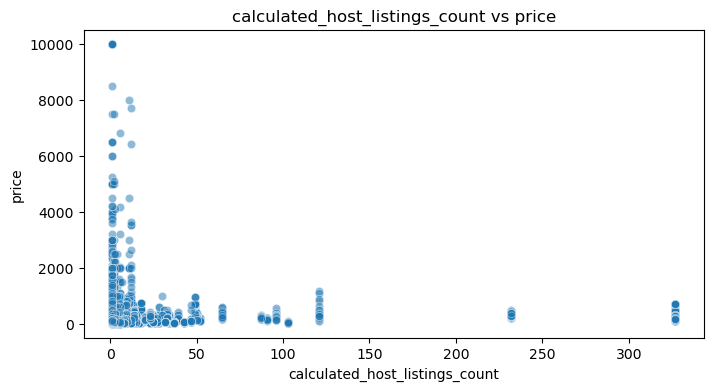

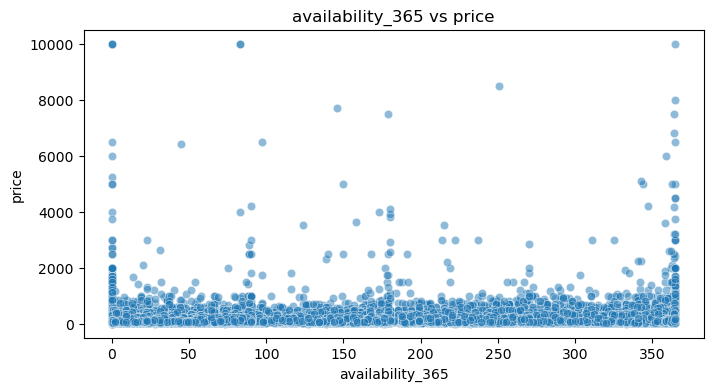

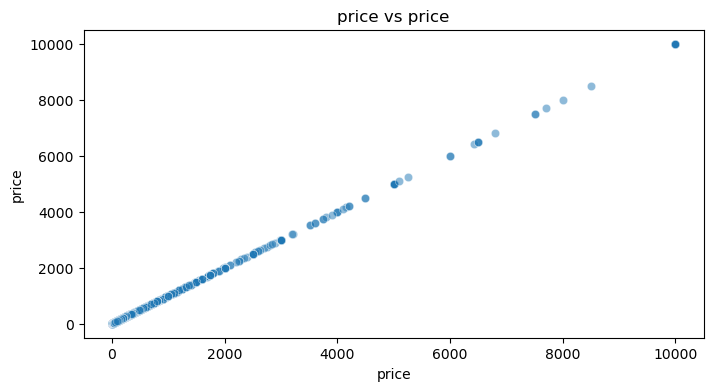

/tmp/ipykernel_1113/259640098.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], y=data[target], palette='Set3')


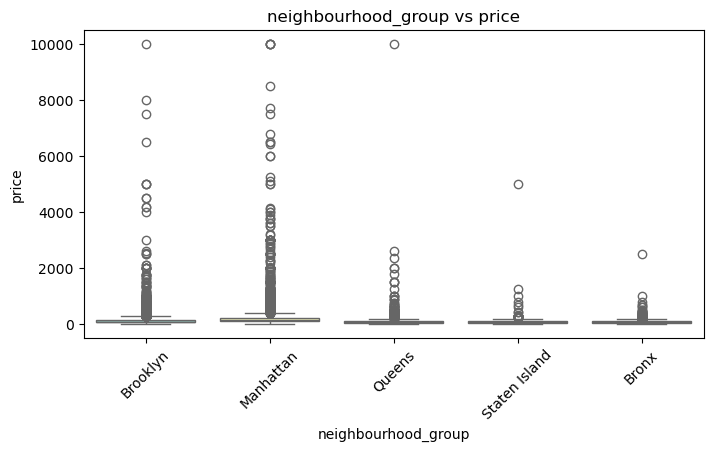

/tmp/ipykernel_1113/259640098.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], y=data[target], palette='Set3')


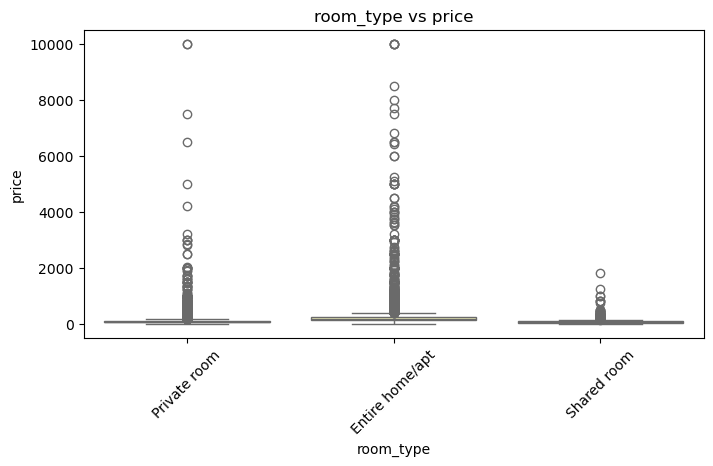

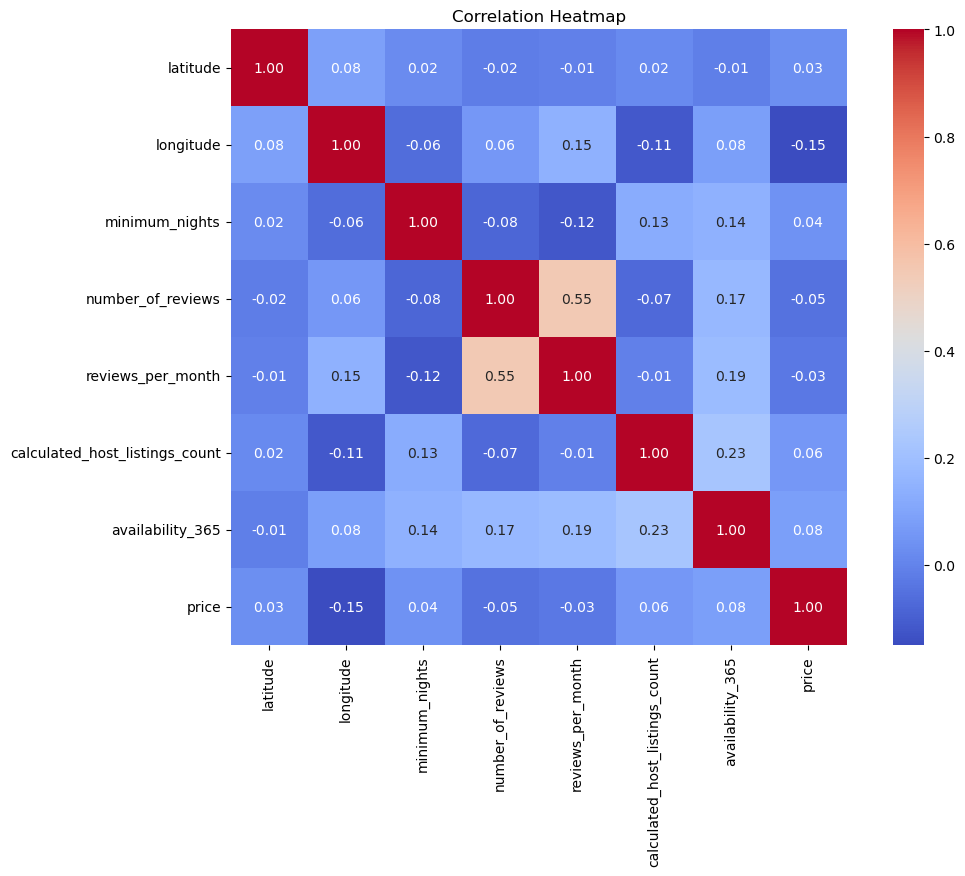

/tmp/ipykernel_1113/6586503.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], palette='pastel')


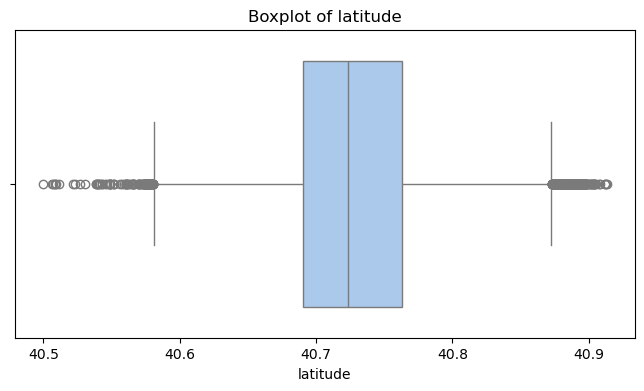

/tmp/ipykernel_1113/6586503.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], palette='pastel')


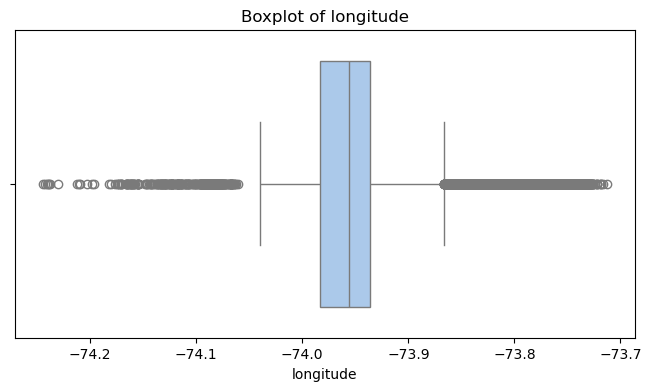

/tmp/ipykernel_1113/6586503.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], palette='pastel')


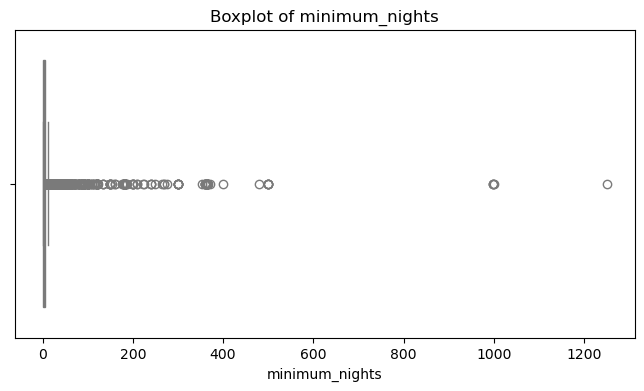

/tmp/ipykernel_1113/6586503.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], palette='pastel')


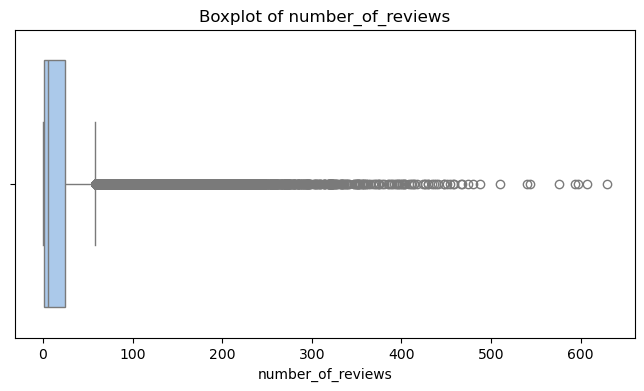

/tmp/ipykernel_1113/6586503.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], palette='pastel')


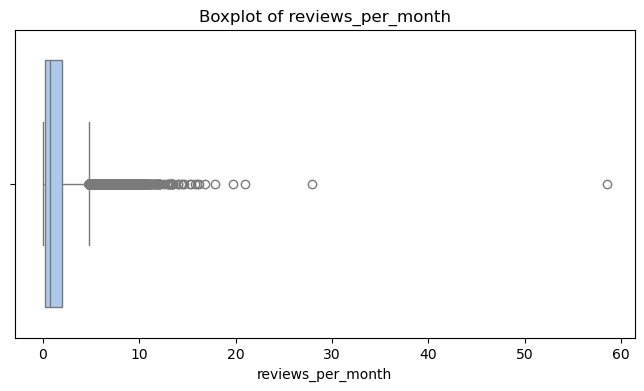

/tmp/ipykernel_1113/6586503.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], palette='pastel')


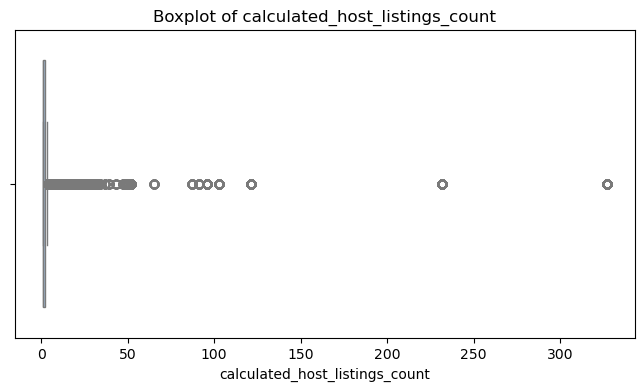

/tmp/ipykernel_1113/6586503.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], palette='pastel')


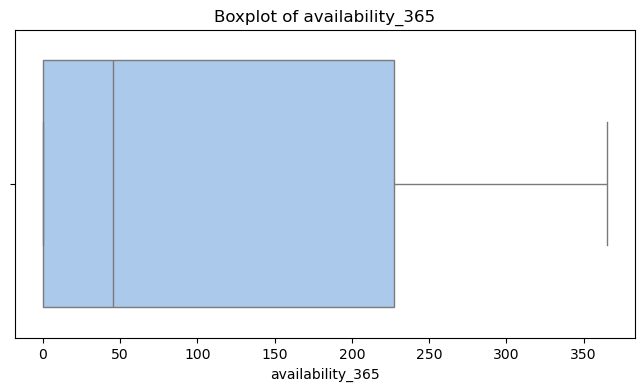

/tmp/ipykernel_1113/6586503.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[feature], palette='pastel')


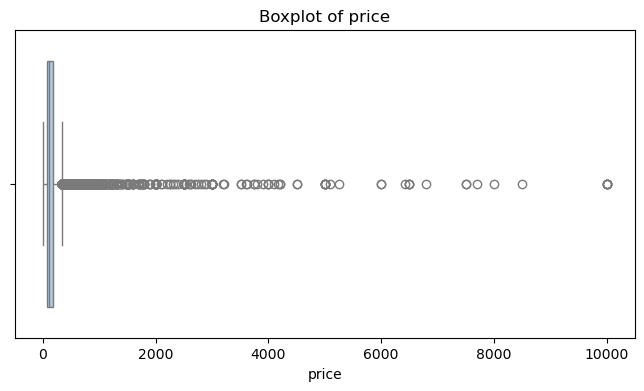

In [11]:
# Run the EDA pipeline
file_path = "AB_NYC_2019.csv"  
eda_pipeline(file_path)

# Data Preprocessing and Model implementation

In [12]:
#Load and preprocess data
def load_data(filepath):
    data = pd.read_csv(filepath)
    data = data[data['price'] > 0]
    return data

def preprocess_data(data):
    data['reviews_per_month'].fillna(0, inplace=True)
    return data

In [13]:
#Feature engineering
def feature_engineering(data):
    data['distance_from_center'] = ((data['latitude'] - 40.7128)**2 + (data['longitude'] - (-74.0060))**2)**0.5
    return data

In [14]:
#Preprocessing pipeline
def create_preprocessor():
    numeric_features = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
                        'reviews_per_month', 'calculated_host_listings_count', 'availability_365',
                        'distance_from_center']
    categorical_features = ['neighbourhood_group', 'neighbourhood', 'room_type']

    numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy = 'median')),('scaler', StandardScaler())])
    categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy = 'constant', fill_value = 'unknown')),('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ]
    )
    return preprocessor

In [15]:
#Train models using pipelines
def train_models(X_train, y_train):
    preprocessor = create_preprocessor()

    models = {
        'RandomForest': Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', RandomForestRegressor(random_state=42))
        ]),
        'XGBoost': Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', XGBRegressor(objective='reg:squarederror', random_state=42))
        ])
    }

In [16]:
#Train models using pipelines
def train_models(X_train, y_train):
    preprocessor = create_preprocessor()

    models = {
        'RandomForest': Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', RandomForestRegressor(random_state=42))
        ]),
        'XGBoost': Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', XGBRegressor(objective='reg:squarederror', random_state=42))
        ])
    }

    # Hyperparameter tuning
    param_grids = {
        'RandomForest': {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [5, 10, 20]
        },
        'XGBoost': {
            'model__n_estimators': [50, 100, 200],
            'model__learning_rate': [0.01, 0.1, 0.2],
            'model__max_depth': [3, 5, 7]
        }
    }

    best_models = {}
    for name, pipeline in models.items():
        grid_search = GridSearchCV(pipeline, param_grids[name], cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_

    return best_models

In [17]:
#Evaluate Models
def evaluate_models(models, X_test, y_test):
    metrics = {}
    for name, model in models.items():
        y_pred = model.predict(X_test)
        metrics[name] = {
            'MAE': mean_absolute_error(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'R2': r2_score(y_test, y_pred)
        }
    return metrics

In [18]:
#Visualize results
def visualize_predictions(models, X_test, y_test):
    plt.figure(figsize=(12, 6))
    for name, model in models.items():
        y_pred = model.predict(X_test)
        sns.regplot(x=y_test, y=y_pred, label=name, line_kws={'color': 'orange'})
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.legend()
    plt.title("Actual vs Predicted Prices")
    plt.show()

In [19]:
#Main pipeline
def main(filepath):
    # Load and preprocess data
    data = load_data(filepath)
    data = preprocess_data(data)
    data = feature_engineering(data)

    # Split data
    X = data.drop(columns=['price', 'id', 'host_id', 'name', 'host_name', 'last_review'], errors='ignore')
    y = data['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and evaluate models
    models = train_models(X_train, y_train)
    metrics = evaluate_models(models, X_test, y_test)
    visualize_predictions(models, X_test, y_test)

    # Print metrics
    for name, metric in metrics.items():
        print(f"{name} Metrics: MAE={metric['MAE']:.2f}, RMSE={metric['RMSE']:.2f}, R2={metric['R2']:.2f}")


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux201

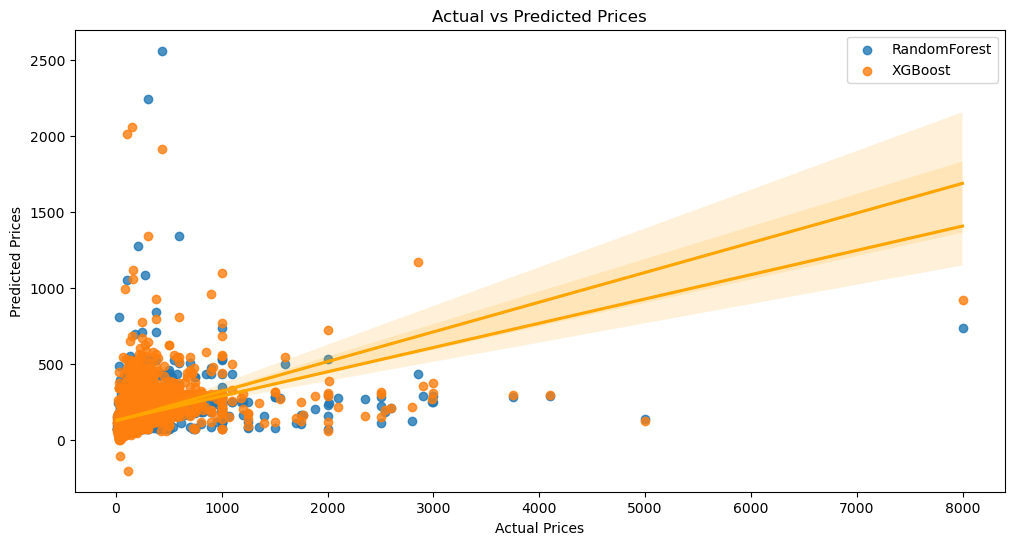

RandomForest Metrics: MAE=68.06, RMSE=186.49, R2=0.13
XGBoost Metrics: MAE=66.23, RMSE=182.55, R2=0.17


In [20]:
file_path = "AB_NYC_2019.csv"
main(file_path)

To compare the performance of the Random Forest and XGBoost models, let's analyze the metrics provided:

1. **Mean Absolute Error (MAE):**
   - Random Forest: **68.06**
   - XGBoost: **66.23**
   - **Lower is better**: XGBoost has a slightly lower MAE, indicating it makes less error on average per prediction compared to Random Forest.

2. **Root Mean Square Error (RMSE):**
   - Random Forest: **186.49**
   - XGBoost: **182.55**
   - **Lower is better**: XGBoost also has a lower RMSE, meaning it performs better in handling larger errors since RMSE penalizes large errors more heavily than MAE.

3. **R² (Coefficient of Determination):**
   - Random Forest: **0.13**
   - XGBoost: **0.17**
   - **Higher is better**: XGBoost explains slightly more of the variance in the target variable than Random Forest does.

**Conclusion:**
XGBoost outperforms Random Forest across all three metrics (MAE, RMSE, and R²). It is the **better model** in this case, as it produces more accurate predictions and captures more variance in the data, although marginally.